In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

In [3]:
df = pd.read_csv('food_orders_new_delhi (1).csv')

df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,None,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,None,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Order Value,1000.0,1053.969,530.975339,104.0,597.75,1038.5,1494.00,1995.0
Delivery Fee,1000.0,28.620,16.958278,0.0,20.00,30.0,40.00,50.0
Commission Fee,1000.0,126.990,43.064050,50.0,90.00,127.0,164.00,200.0
Payment Processing Fee,1000.0,29.832,11.627165,10.0,20.00,30.0,40.00,50.0
Refunds/Chargebacks,1000.0,28.300,49.614228,0.0,0.00,0.0,50.00,150.0


<AxesSubplot:>

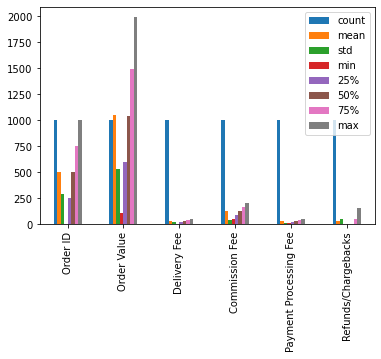

In [5]:
df.describe().T.plot(kind='bar')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [7]:
df.isna().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

<AxesSubplot:>

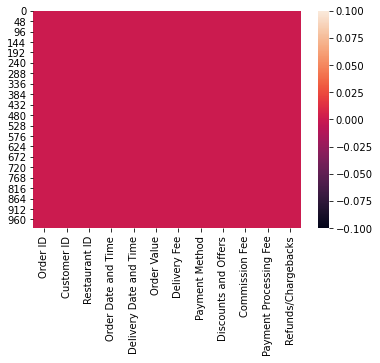

In [8]:
sns.heatmap(df.isna())

In [9]:
df.duplicated().sum()

0

In [10]:
df['Discounts and Offers'].fillna(0, inplace=True)

In [11]:
##### A moeda do dataset é rupia, então irei fazer a conversão para dolar

exchange_rate_inr_to_usd = 0.013

df['Order Value USD'] = df['Order Value'] * exchange_rate_inr_to_usd
df['Paymente Processing Fee USD'] = df['Payment Processing Fee'] * exchange_rate_inr_to_usd
df['Comission Fee USD'] = df['Commission Fee'] * exchange_rate_inr_to_usd
df['Delivery Fee USD'] = df['Delivery Fee'] * exchange_rate_inr_to_usd

In [12]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [13]:
Payment_count = df['Payment Method'].value_counts()
Payment_count

Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: Payment Method, dtype: int64

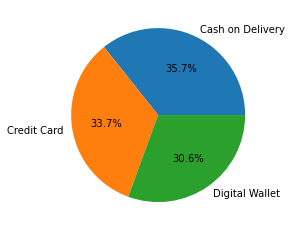

In [14]:
Payment_count.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [15]:
df['Discouts and Offers'] = df['Discounts and Offers'].astype(str)
df_sorted = df.sort_values(by='Discounts and Offers', ascending=False)
df_sorted

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Value USD,Paymente Processing Fee USD,Comission Fee USD,Delivery Fee USD,Discouts and Offers
599,600,C6124,R2364,2024-01-18 22:55:30,2024-01-18 23:30:30,767,30,Cash on Delivery,None,176,42,0,9.971,0.546,2.288,0.39,None
625,626,C7600,R2016,2024-01-23 06:52:24,2024-01-23 08:47:24,799,30,Cash on Delivery,None,78,28,100,10.387,0.364,1.014,0.39,None
357,358,C2693,R2780,2024-01-05 08:52:19,2024-01-05 09:23:19,930,20,Credit Card,None,108,40,0,12.090,0.520,1.404,0.26,None
154,155,C6232,R2824,2024-01-01 10:05:21,2024-01-01 11:48:21,557,30,Cash on Delivery,None,98,50,0,7.241,0.650,1.274,0.39,None
156,157,C7585,R2645,2024-01-02 19:28:18,2024-01-02 20:44:18,1974,20,Digital Wallet,None,87,19,0,25.662,0.247,1.131,0.26,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,C2150,R2028,2024-02-01 19:05:43,2024-02-01 20:10:43,1341,30,Cash on Delivery,10%,153,16,50,17.433,0.208,1.989,0.39,10%
243,244,C6699,R2865,2024-01-09 02:09:16,2024-01-09 03:25:16,924,50,Digital Wallet,10%,80,45,50,12.012,0.585,1.040,0.65,10%
369,370,C2664,R2317,2024-01-25 04:42:25,2024-01-25 06:37:25,1205,30,Cash on Delivery,10%,116,39,0,15.665,0.507,1.508,0.39,10%
843,844,C3898,R2358,2024-02-07 18:24:10,2024-02-07 18:55:10,368,50,Digital Wallet,10%,112,45,0,4.784,0.585,1.456,0.65,10%


In [16]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Value USD,Paymente Processing Fee USD,Comission Fee USD,Delivery Fee USD,Discouts and Offers
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,24.882,0.611,1.950,0.00,5% on App
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,12.818,0.299,2.574,0.52,10%
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,12.181,0.585,2.535,0.39,15% New User
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,19.019,0.351,1.898,0.65,None
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,25.896,0.650,1.690,0.39,50 off Promo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,10.725,0.611,2.145,0.00,5% on App
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,None,110,42,0,21.151,0.546,1.430,0.65,None
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,None,64,31,0,7.189,0.403,0.832,0.26,None
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,18.382,0.442,2.587,0.00,15% New User


In [17]:
df['Discounts and Offers'].value_counts()

10%             233
50 off Promo    201
15% New User    198
None            185
5% on App       183
Name: Discounts and Offers, dtype: int64

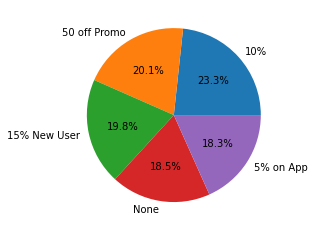

In [18]:
df['Discounts and Offers'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

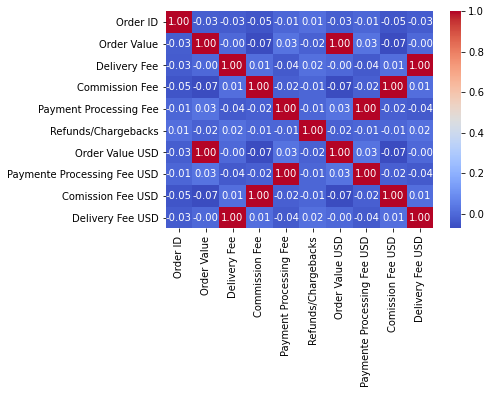

In [19]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [20]:
df.to_excel('delivery.xlsx')